<a href="https://colab.research.google.com/github/Da4kek/Artificial-Intelligence-and-agents/blob/main/IET_Hackathon%6023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Problem - Tour Agent

The problem is to find the shortest route that travels to all the tourist destinations in Bhubaneshwar. The map shows important locations n the city which roads connecting them. The cost of taking a particular road is given adjacent to them. Help your surveillance drone agent in finding such a path given a starting point and the map.

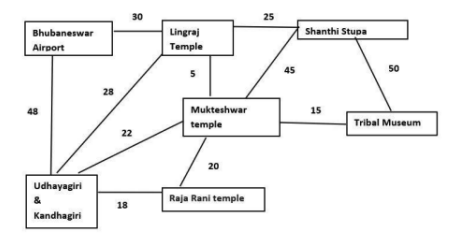

Solution - To build an agent with:
1. Greedy Best First Search (GBFS)
2. Ant Colony Optimization (ACO)

these algorithms.

---

### My approach:

I will be creating two algorithms separately, simulate them on the above map and then create an Agent-based algorithm to see if the results change.

### My intuition:

First to understand the problem and the algorithm, I've built the algorithm from scratch and see how it does with the data and then create the agent.
There are two ways in which we can incorporate both the algorithms:
- Creating two agents separately and run them on the same environment to see which does better (or)
- Create two agents and introduce cooperative strategy and see how it does. (I'm not going to do this as its more complicated and not computationally feasible).

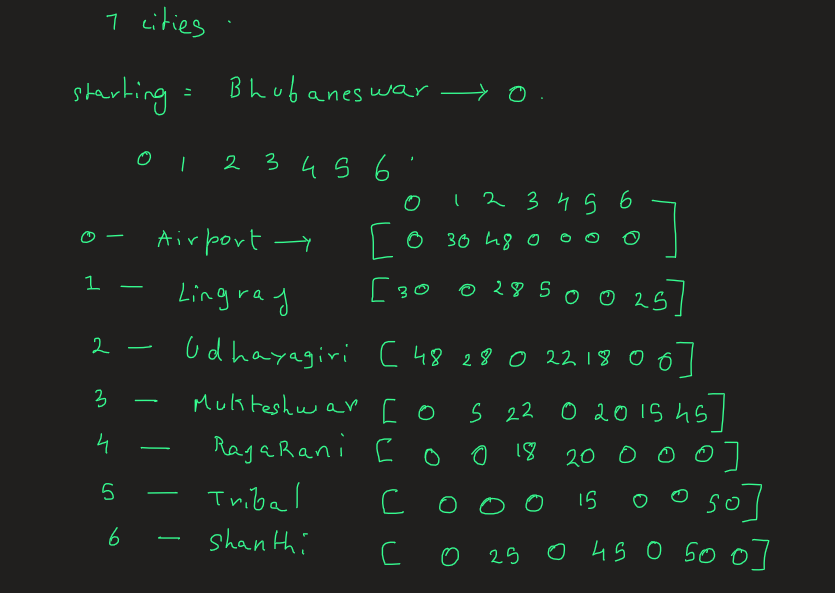

In [ ]:
MATRIX = np.array([
    [0, 30, 48, np.inf, np.inf, np.inf, np.inf],
    [30, 0, 28, 5, np.inf, np.inf, 25],
    [48, 28, 0, 22, 18, np.inf, np.inf],
    [np.inf, 5, 22, 0, 20, 15, 45],
    [np.inf, np.inf, 18, 20, 0, np.inf, np.inf],
    [np.inf, np.inf, np.inf, 15, 0, np.inf, 50],
    [np.inf, 25, np.inf, 45, np.inf, 50, 0]
])

MATRIX1 = np.array([
    [0, 30, 48, 0, 0, 0, 0],
    [30, 0, 28, 5, 0, 0, 25],
    [48, 28, 0, 22, 18, 0, 0],
    [0, 5, 22, 0, 20, 15, 45],
    [0, 0, 18, 20, 0, 0, 0],
    [0, 0, 0, 15, 0, 0, 50],
    [0, 25, 0, 45, 0, 50, 0]
])

NANTS = 10
EPOCHS = 100
ALPHA = 1.0
BETA = 2.0
RHO = 0.1

Here I have two matrices, one being `MATRIX` which is the matrix made from the above diagram, and `MATRIX1` which is used in ACO algorithm. (*I couldn't train the non-agent algorithm with NULL paths due to some issues in the algorithm*).

NANTS --> Number of ants for ACO   
EPOCHS --> Number of iterations or steps each ant can take      
ALPHA and BETA --> Hyperparameters for ACO   
RHO --> Pheromone evaporation rate parameter for ACO

In [ ]:
def GBFS(distance):
    num_cities = len(distance)
    visited = [False] * num_cities
    tour = []
    current_ = 0
    for _ in range(num_cities):
        tour.append(current_)
        visited[current_] = True
        near = None
        min_distance = float('inf')
        for city in range(num_cities):
            if not visited[city] and distance[current_][city] < min_distance:
                min_distance = distance[current_][city]
                near = city
        if near is not None:
            current_ = near
    return tour

In [ ]:
best_tour_GBFS = GBFS(MATRIX1)
print("Greedy Tour:", best_tour_GBFS)

Greedy Tour: [0, 3, 1, 4, 5, 2, 6]


# Ant colony optimization:

The code have been written based on the mathematical intuition:

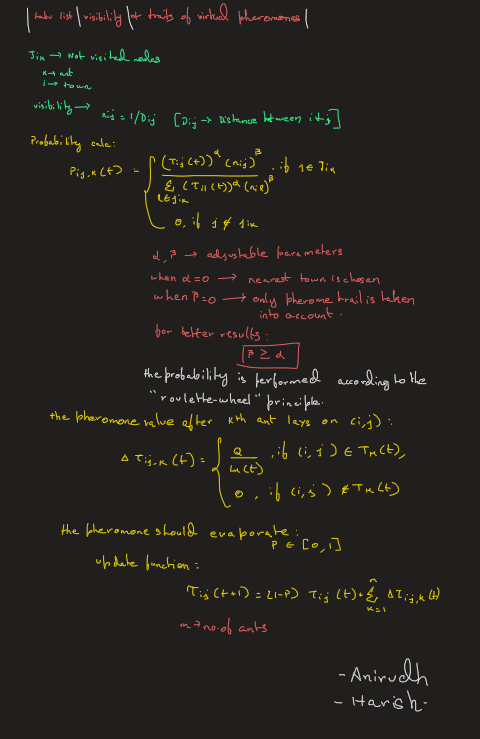

In [ ]:
class ACO():
    def __init__(self, distance, epochs, num_ants, alpha, beta, rho):
        self.distance = distance
        self.epochs = epochs
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.num_cities = len(distance)

    def calc_tour_length(self, tour):
        total_distance = 0
        for i in range(len(tour) - 1):
            total_distance += self.distance[tour[i]][tour[i + 1]]
        total_distance += self.distance[tour[-1]][tour[0]]
        return total_distance

    def TOUR(self):
        unvisited = list(range(self.num_cities))
        current = random.choice(unvisited)
        tour = [current]
        unvisited.remove(current)

        while unvisited:
            nearest = min(unvisited, key=lambda city: self.distance[current][city])
            tour.append(nearest)
            unvisited.remove(nearest)
            current = nearest
        return tour

    def AntColonyOpt(self):
        best_tour = None
        best_distance = float("inf")

        for iteration in range(self.epochs):
            phero_mat = np.random.rand(self.num_cities, self.num_cities)
            ant_tours = []

            for ant in range(self.num_ants):
                tour = self.TOUR()
                ant_tours.append(tour)

            for tour in ant_tours:
                tour_length = self.calc_tour_length(tour)
                if tour_length < best_distance:
                     best_distance = tour_length
                     best_tour = tour.copy()

                delta_pheromone = 1 / tour_length
                for i in range(len(tour) - 1):
                    from_city, to_city = tour[i], tour[i + 1]
                    phero_mat[from_city][to_city] += delta_pheromone
                    phero_mat[to_city][from_city] += delta_pheromone

            phero_mat *= (1 - self.rho)

        return best_tour

In [ ]:
aco = ACO(MATRIX1,EPOCHS,NANTS,ALPHA,BETA,RHO)
best_tour_ACO = aco.AntColonyOpt()

print(best_tour_ACO)


[4, 0, 3, 1, 5, 2, 6]


In [ ]:
print(best_tour_GBFS)
print(best_tour_ACO)

[0, 3, 1, 4, 5, 2, 6]
[4, 0, 3, 1, 5, 2, 6]


In [ ]:
class GBFSAgent:
    def __init__(self, name):
        self.name = name

    def gbfs_search(self, distance_matrix):
        num_cities = len(distance_matrix)
        unvisited = set(range(num_cities))
        current_city = random.randint(0, num_cities - 1)
        tour = [current_city]

        while unvisited:
            unvisited.remove(current_city)
            reachable_cities = [city for city in unvisited if distance_matrix[current_city][city] != np.inf]
            if not reachable_cities:
                break
            nearest = min(reachable_cities, key=lambda city: distance_matrix[current_city][city])
            tour.append(nearest)
            current_city = nearest

        print(f"{self.name}: GBFS Tour = {tour}")

agent1 = GBFSAgent("GBFS Agent 1",)
agent2 = GBFSAgent("GBFS Agent 2",)

agent1.gbfs_search(MATRIX)
agent2.gbfs_search(MATRIX)

GBFS Agent 1: GBFS Tour = [0, 1, 3, 5, 4, 2]
GBFS Agent 2: GBFS Tour = [2, 4, 3, 1, 6, 5]


In [ ]:
print(best_tour_GBFS)

[0, 3, 1, 4, 5, 2, 6]


## ACOAGENT:

the ACOAgent is a rewritten version of the algorithm mentioned above, I've added compatibility for null values or non-connected nodes to be neglected, and an Agent based algorithm to be used along GBFSAgent

In [ ]:
class ACOAgent:
    def __init__(self, name, num_ants, epochs, alpha, beta, rho):
        self.name = name
        self.num_ants = num_ants
        self.epochs = epochs
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.pheromone_matrix = None

    def initialize_pheromone_matrix(self, num_cities):
        self.pheromone_matrix = np.ones((num_cities, num_cities)) * 0.1

    def aco_search(self, distance_matrix):
        num_cities = len(distance_matrix)
        self.initialize_pheromone_matrix(num_cities)

        best_tour = None
        best_distance = float('inf')

        for iteration in range(self.epochs):
            ant_tours = []

            for ant in range(self.num_ants):
                tour, tour_length = self.construct_tour(distance_matrix)
                ant_tours.append((tour, tour_length))

                if tour_length < best_distance:
                    best_tour = tour
                    best_distance = tour_length

            self.update_pheromone_matrix(ant_tours)

        print(f"{self.name}: ACO Tour = {best_tour}")

    def construct_tour(self, distance_matrix):
        num_cities = len(distance_matrix)
        tour = []
        visited = [False] * num_cities
        start_city = random.randint(0, num_cities - 1)
        current_city = start_city
        tour_length = 0

        for _ in range(num_cities - 1):
            visited[current_city] = True
            tour.append(current_city)

            probabilities = self.calculate_probabilities(current_city, visited, distance_matrix)

            current_city = self.select_next_city(probabilities)

            tour_length += distance_matrix[tour[-1]][current_city]

        tour.append(start_city)
        tour_length += distance_matrix[tour[-2]][start_city]

        return tour, tour_length

    def calculate_probabilities(self, current_city, visited, distance_matrix):
        num_cities = len(distance_matrix)
        unvisited_cities = [i for i in range(num_cities) if not visited[i]]
        probabilities = []

        for city in unvisited_cities:
            pheromone = self.pheromone_matrix[current_city][city]
            distance = distance_matrix[current_city][city]

            if distance == 0:
                distance = 0.001

            probability = (pheromone ** self.alpha) * ((1 / distance) ** self.beta)
            probabilities.append((city, probability))

        total_probability = sum(prob for _, prob in probabilities)

        if total_probability == 0:
            return [(city, 1 / len(probabilities)) for city in unvisited_cities]

        normalized_probabilities = [(city, prob / total_probability) for city, prob in probabilities]
        return normalized_probabilities

    def select_next_city(self, probabilities):
        city, _ = random.choices(probabilities, k=1)[0]
        return city

    def update_pheromone_matrix(self, ant_tours):
        evaporation_rate = 1 - self.rho

        self.pheromone_matrix *= evaporation_rate

        for tour, tour_length in ant_tours:
            if tour_length == 0:
                continue

            for i in range(len(tour) - 1):
                city1, city2 = tour[i], tour[i + 1]
                self.pheromone_matrix[city1][city2] += 1 / tour_length
                self.pheromone_matrix[city2][city1] += 1 / tour_length

In [ ]:
agent1 = ACOAgent("ACO Agent 1", num_ants=NANTS, epochs=EPOCHS, alpha=ALPHA, beta=BETA, rho=RHO)
agent2 = ACOAgent("ACO Agent 2", num_ants=NANTS, epochs=EPOCHS, alpha=ALPHA, beta=BETA, rho=RHO)

In [ ]:
agent1.aco_search(MATRIX)
agent2.aco_search(MATRIX)

ACO Agent 1: ACO Tour = [3, 5, 4, 2, 0, 1, 3]
ACO Agent 2: ACO Tour = [6, 1, 0, 2, 3, 5, 6]


In [ ]:
def run_agents(aco_agent, gbfs_agent,distance_matrix):
    aco_agent.aco_search(distance_matrix)
    gbfs_agent.gbfs_search(distance_matrix)

aco_agent = ACOAgent("ACO Agent", num_ants=NANTS, epochs=EPOCHS, alpha=ALPHA, beta=BETA, rho=RHO)

gbfs_agent = GBFSAgent("GBFS Agent")

run_agents(aco_agent,gbfs_agent,MATRIX)

ACO Agent: ACO Tour = [1, 6, 3, 5, 4, 2, 1]
GBFS Agent: GBFS Tour = [0, 1, 3, 5, 4, 2]


For more theoretical intuition behind the algorithms:
[Theoretical Intuition](https://docs.google.com/document/d/1Yvi8uSFk33rYmBBV1nEM8cDqkC9V2T6z/edit?usp=sharing&ouid=107391475503441475425&rtpof=true&sd=true)